# Task 1: PREDICTION USING SUPERVISED ML Algorithm

# THE SPARKS FOUNDATION

# By: ANSHUMAN NANDA

# OBJECTIVE OF TASK: Predict the percentage of a student based on number of study hours.

In [21]:
#importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Libraries Imported")

Libraries Imported


In [22]:
#reading data from localdrive
data = pd.read_excel("Study_hour_task1.xlsx")

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 25
Columns: 2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting of data:

To check and study the relationship between our variables

**Plotting the distribution of scores**

Plotting Scatter Plot:
A type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

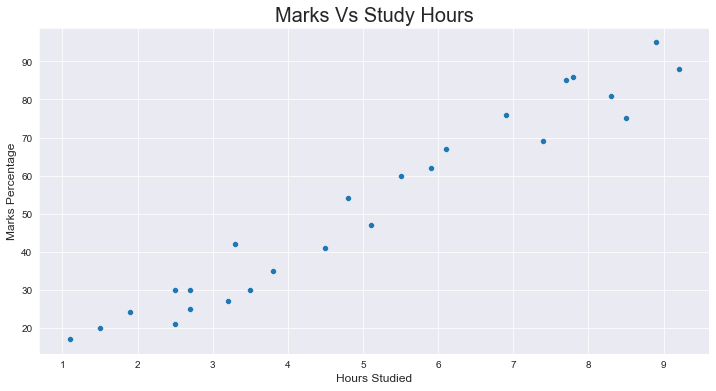

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

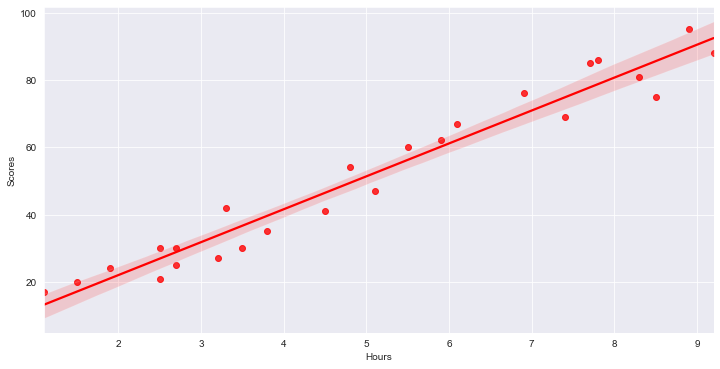

In [25]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.regplot(x = "Hours", y = "Scores", data=data, color = 'r')
plt.show()

In [32]:
#Correlation between the variables:
correlation = data.corr()

<AxesSubplot:>

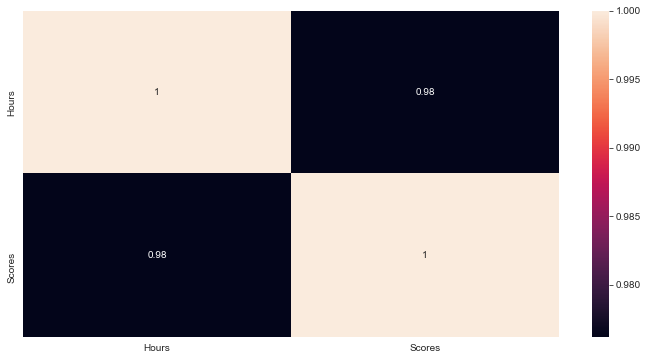

In [33]:
#plotting the correlation

plt.figure(figsize=(12,6))
sns.heatmap(data=correlation, annot = True)

# Building the algorithm model:

In [12]:
#importing train_test_split
from sklearn.model_selection import train_test_split
#Splitting data into X and y

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [13]:
#Distributing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
#importing linear regression
from sklearn.linear_model import LinearRegression

# Linear Regression:

**Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).**

In [10]:
lnr = LinearRegression()

In [14]:
#Fitting the train dataset
lnr.fit(X_train, y_train)

LinearRegression()

In [16]:
#predicting the value of our X-test dataset
pred_y = lnr.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,8.3,83.502444
1,2.5,27.530757
2,2.5,27.530757
3,6.9,69.992037
4,5.9,60.341746
5,2.7,29.460815
6,3.3,35.250990
7,5.1,52.621513
8,3.8,40.076135


# Comparing the actual and predicted scores

In [17]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


# Calculating the accuracy of the model

In [18]:
from sklearn.metrics import mean_absolute_error

#Finding Mean Absolute Error
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.564015037730867


In [19]:
#Finding Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred_y)
print("Mean Squared Error:", MSE)

Mean Squared Error: 24.074686364260973


In [58]:
#Finding Root Mean Squared Error
from math import sqrt

RMSE = sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 4.9065962096203695


# Question: What will be the predicted score if a student studies for 9.5 hours per day?

In [29]:
hours = [9.5]
answer = lnr.predict([hours])
print("No of hours studied = {}".format(hours))
print("Predicted Score = {}".format(round(answer[0],3)))

No of hours studied = [9.5]
Predicted Score = 95.083


# Thank you for going through my notebook!